# **Proyek Predictive Analytics**

Nama : Gevira Zahra Shofa

**Data Collection**

In [19]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Load dataset
df = pd.read_csv("House_Rent_Dataset.csv")

**Data Understanding & Removing Outlier**

In [21]:
# Informasi data
print("Jumlah baris dan kolom:", df.shape)
print("\nInfo dataset:")
print(df.info())
print("\nStatistik deskriptif:")
print(df.describe())
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())

Jumlah baris dan kolom: (4746, 12)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
None

Statistik deskriptif:
               BHK          Rent         Size     Bathroom
count  4746.000000  4.746000e+03  4746.000000 

In [22]:
# Untuk fitur Posted On dan Point of Contract tidak mempengaruhi harga sewa model jadi akan saya hapus
df = df.drop(['Posted On', 'Point of Contact'], axis = 'columns')

**Univariate Analysis**

In [23]:
# Cek distribusi jumlah data pada fitur 'Area Type'
print("Distribusi Area Type sebelum pembersihan:")
print(df['Area Type'].value_counts())

Distribusi Area Type sebelum pembersihan:
Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64


In [24]:
# Hapus baris yang memiliki 'Area Type' = 'Built Area' karena hanya ada 2 sampel
df = df[df['Area Type'] != 'Built Area']

In [25]:
print("\nDistribusi Area Type setelah pembersihan:")
print(df['Area Type'].value_counts())


Distribusi Area Type setelah pembersihan:
Area Type
Super Area     2446
Carpet Area    2298
Name: count, dtype: int64


In [26]:
# Tampilkan ringkasan jumlah data untuk beberapa fitur kategorikal
for col in ['City', 'Furnishing Status', 'Tenant Preferred']:
    print(f"\nDistribusi kategori pada kolom {col}:")
    print(df[col].value_counts())


Distribusi kategori pada kolom City:
City
Mumbai       972
Chennai      890
Bangalore    886
Hyderabad    867
Delhi        605
Kolkata      524
Name: count, dtype: int64

Distribusi kategori pada kolom Furnishing Status:
Furnishing Status
Semi-Furnished    2251
Unfurnished       1814
Furnished          679
Name: count, dtype: int64

Distribusi kategori pada kolom Tenant Preferred:
Tenant Preferred
Bachelors/Family    3442
Bachelors            830
Family               472
Name: count, dtype: int64


In [27]:
# Tampilkan jumlah nilai unik untuk 'Floor' dan 'Area Locality'
print("\nJumlah kategori unik pada 'Floor':", df['Floor'].nunique())
print("Jumlah kategori unik pada 'Area Locality':", df['Area Locality'].nunique())


Jumlah kategori unik pada 'Floor': 480
Jumlah kategori unik pada 'Area Locality': 2234


In [28]:
# Drop kolom yang terlalu kompleks atau tidak berguna untuk prediksi
df.drop(columns=['Floor', 'Area Locality'], inplace=True)

In [29]:
# Tampilkan 5 baris awal dataset setelah pembersihan
print(df.head())

   BHK   Rent  Size    Area Type     City Furnishing Status  Tenant Preferred  \
0    2  10000  1100   Super Area  Kolkata       Unfurnished  Bachelors/Family   
1    2  20000   800   Super Area  Kolkata    Semi-Furnished  Bachelors/Family   
2    2  17000  1000   Super Area  Kolkata    Semi-Furnished  Bachelors/Family   
3    2  10000   800   Super Area  Kolkata       Unfurnished  Bachelors/Family   
4    2   7500   850  Carpet Area  Kolkata       Unfurnished         Bachelors   

   Bathroom  
0         2  
1         1  
2         1  
3         1  
4         1  


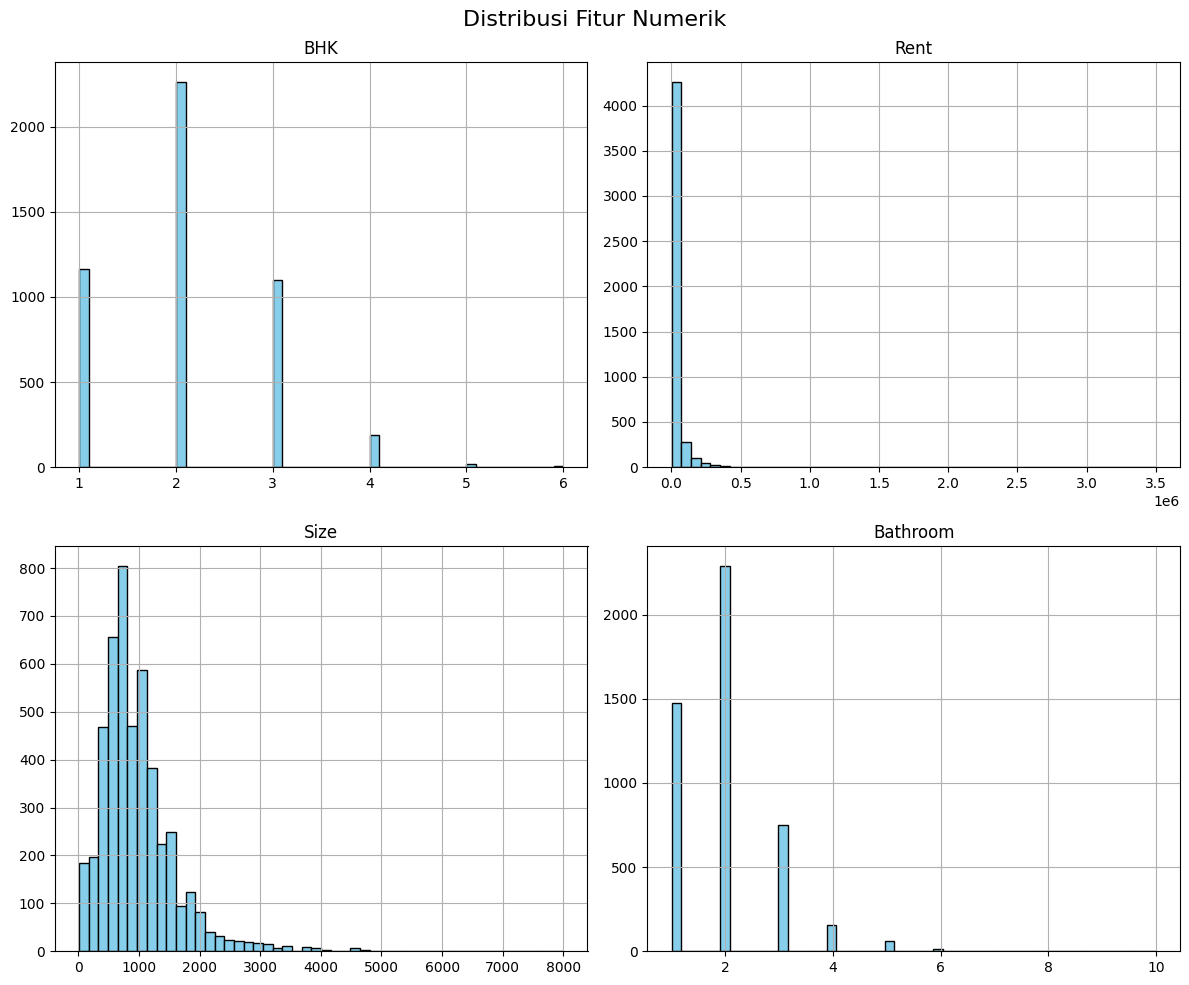

In [30]:
# Visualisasi distribusi semua fitur numerik dengan histogram
df.hist(bins=50, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.tight_layout()
plt.show()

In [31]:
# Ringkasan statistik untuk kolom Rent
print("\nStatistik deskriptif untuk kolom 'Rent':")
print(df['Rent'].describe().apply(lambda val: f"{val:,.2f}"))


Statistik deskriptif untuk kolom 'Rent':
count        4,744.00
mean        35,003.78
std         78,121.20
min          1,200.00
25%         10,000.00
50%         16,000.00
75%         33,000.00
max      3,500,000.00
Name: Rent, dtype: object


**Multivariate Analysis**

In [32]:
# Menambahkan fitur baru yaitu 'Price per sqft' dengan rumus Rent dikali 1000 dibagi Size
df['Price_per_sqft'] = (df['Rent'] * 1000) / df['Size']

In [33]:
# Mendeteksi outlier berdasarkan ukuran per BHK
# Misalnya, ukuran lebih kecil dari 300 sqft per BHK, nah berarti dianggap tidak biasa
df[(df.Size / df.BHK) < 300].head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
7,1,5000,250,Super Area,Kolkata,Unfurnished,Bachelors,1,20000.000000
12,1,6500,250,Carpet Area,Kolkata,Furnished,Bachelors,1,26000.000000
21,2,9000,400,Carpet Area,Kolkata,Unfurnished,Bachelors,2,22500.000000
32,2,6000,550,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,10909.090909
33,2,5000,500,Carpet Area,Kolkata,Unfurnished,Bachelors/Family,2,10000.000000


In [34]:
# Menampilkan dimensi data sebelum pemrosesan
df.shape

(4744, 9)

In [35]:
# Menghapus outlier berdasarkan ukuran per BHK
df_cleaned = df[~(df.Size / df.BHK < 300)]
df_cleaned.head()

# Menampilkan dimensi data setelah penghapusan outlier
df_cleaned.shape

(4196, 9)

In [36]:
#  Menganalisis statistik deskriptif dari 'Price per sqft'
df_cleaned.Price_per_sqft.describe().apply(lambda x: format(x, 'f'))

,Price_per_sqft
count,4196.000000
mean,32827.385605
std,41300.048982
min,571.428571
25%,13000.000000
50%,18511.595708
75%,34896.788991
max,1400000.000000


In [37]:
# Fungsi untuk menghapus outlier berdasarkan price per sqft
def remove_outliers_by_price(df):
    df_out = pd.DataFrame()
    for city, sub_df in df.groupby('City'):
        mean_price = np.mean(sub_df['Price_per_sqft'])
        std_dev = np.std(sub_df['Price_per_sqft'])
        filtered_df = sub_df[(sub_df['Price_per_sqft'] > (mean_price - std_dev)) & (sub_df['Price_per_sqft'] <= (mean_price + std_dev))]
        df_out = pd.concat([df_out, filtered_df], ignore_index=True)
    return df_out

In [38]:
# Menghapus outlier berdasarkan 'Price per sqft'
df_without_outliers = remove_outliers_by_price(df_cleaned)
df_without_outliers.shape

(3699, 9)

In [39]:
# Mendeteksi outlier pada jumlah kamar mandi
# Misalnya, jika jumlah kamar mandi lebih dari BHK + 2, dianggap outlier
df_without_outliers[df_without_outliers.Bathroom > (df_without_outliers.BHK + 2)]

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
860,3,20000,1700,Carpet Area,Chennai,Furnished,Bachelors/Family,6,11764.705882
1904,4,150000,4000,Carpet Area,Delhi,Semi-Furnished,Bachelors,7,37500.000000
3328,1,40000,680,Super Area,Mumbai,Furnished,Bachelors/Family,4,58823.529412


In [40]:
# Menghapus outlier berdasarkan jumlah kamar mandi
df_without_outliers = df_without_outliers[~(df_without_outliers.Bathroom > (df_without_outliers.BHK + 2))]
df_without_outliers.head()

# Menampilkan dimensi data setelah pembersihan
df_without_outliers.shape

(3696, 9)

In [41]:
# Menghapus kolom 'Price_per_sqft' karena sudah tidak diperlukan lagi
df_final = df_without_outliers.drop(columns=['Price_per_sqft'])

Text(0.5, 1.0, "Matriks Korelasi antara Fitur Numerik dan 'Rent'")

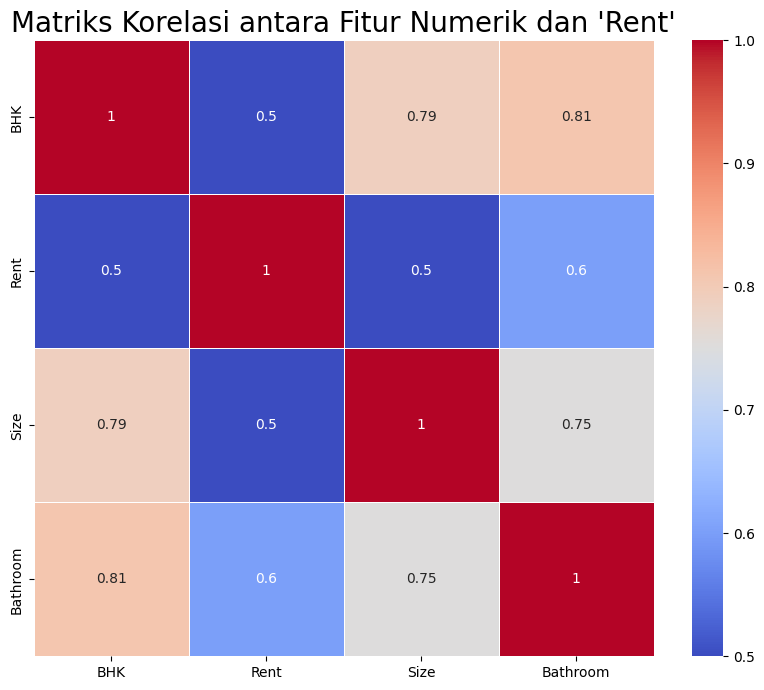

In [44]:
# Menganalisis korelasi antar fitur numerik dan target 'Rent'
plt.figure(figsize=(10, 8))
# Drop non-numeric columns before calculating correlation
corr_matrix = df_final.select_dtypes(include=['number']).corr().round(2)

# Membuat heatmap untuk korelasi antar fitur numerik
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriks Korelasi antara Fitur Numerik dan 'Rent'", fontsize=20)

In [45]:
# Menganalisis hubungan antara fitur kategorikal dan target 'Rent'
categorical_features = df_without_outliers.select_dtypes(include='object').columns.tolist()

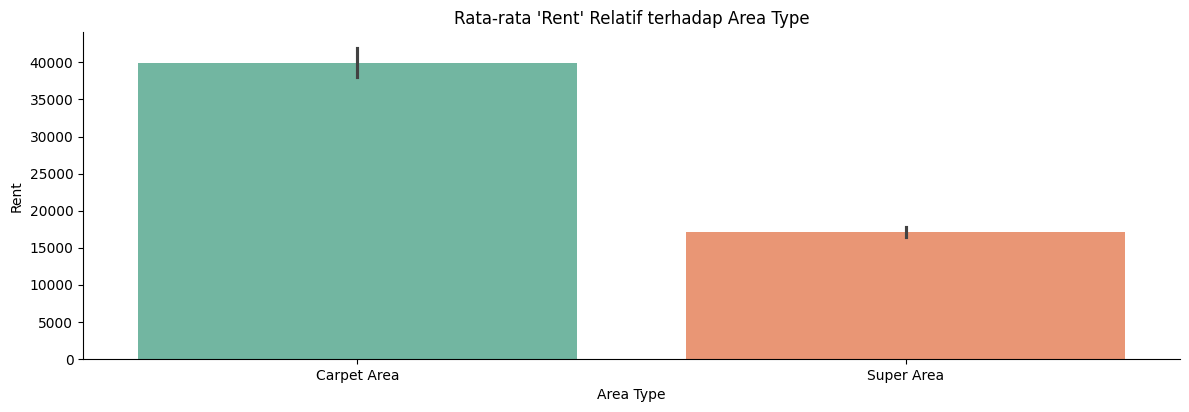

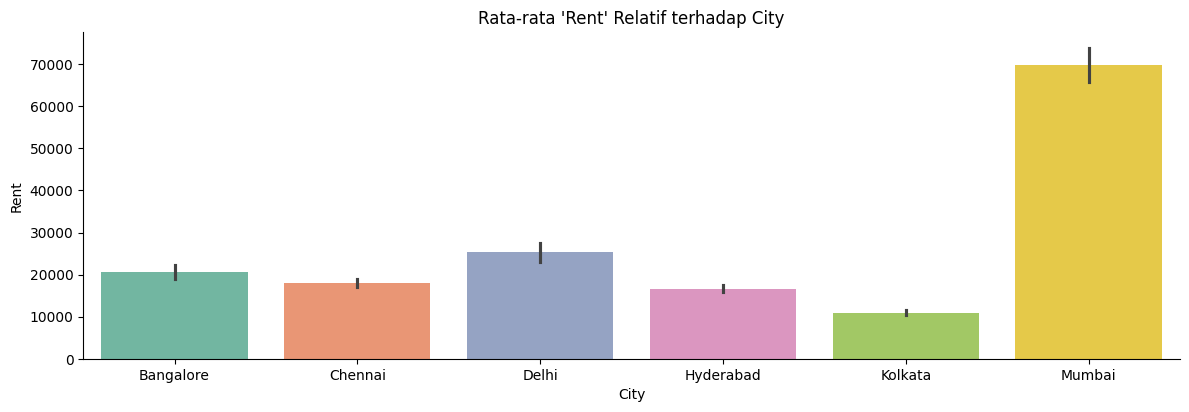

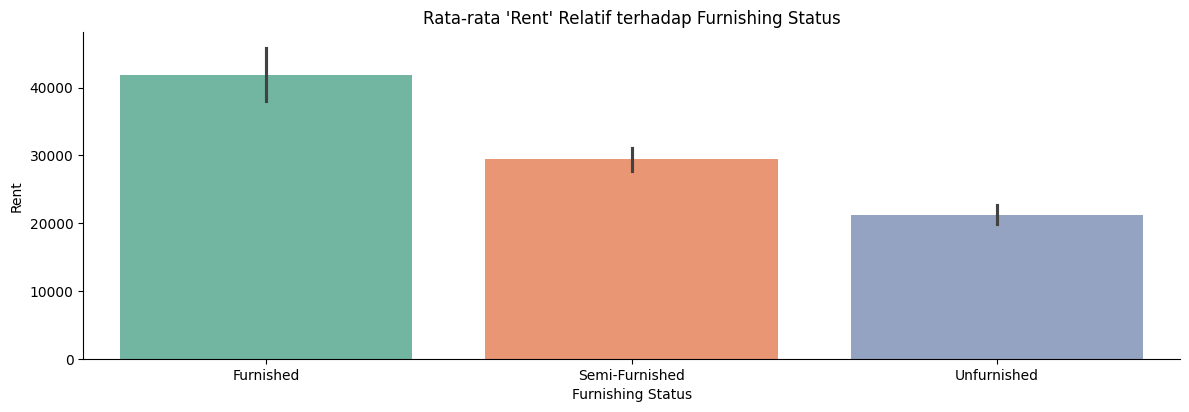

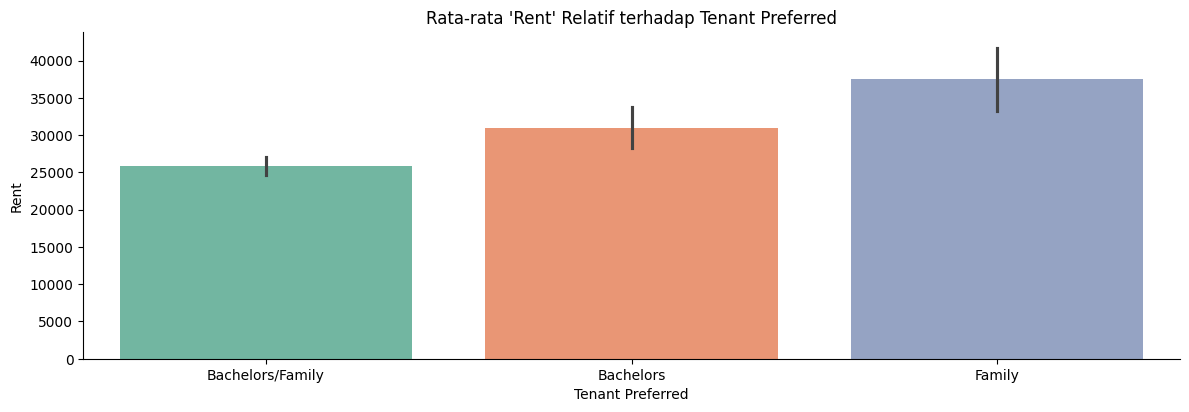

In [47]:
# Membuat grafik bar untuk fitur kategorikal terhadap 'Rent' dengan penyesuaian palet warna dan hue
for feature in categorical_features:
    sns.catplot(x=feature, y="Rent", kind="bar", hue=feature, dodge=False, height=4, aspect=3, data=df_without_outliers, palette="Set2", legend=False)
    plt.title(f"Rata-rata 'Rent' Relatif terhadap {feature}")

**Data Preparation**

In [48]:
# One-Hot Encoding untuk fitur kategorikal
# Menggunakan pd.get_dummies untuk mengubah fitur kategorikal menjadi kolom biner
df_encoded = pd.get_dummies(df_final, drop_first=True)

In [49]:
# Menampilkan 5 baris pertama untuk memastikan perubahan
print("\nContoh data setelah One-Hot Encoding:")
print(df_encoded.head())


Contoh data setelah One-Hot Encoding:
   BHK   Rent  Size  Bathroom  Area Type_Super Area  City_Chennai  City_Delhi  \
0    3  70000  3354         3                 False         False       False   
1    2  10500   800         2                  True         False       False   
2    2  13000  1000         2                  True         False       False   
3    2  17000  1040         2                  True         False       False   
4    3  21000  1403         3                  True         False       False   

   City_Hyderabad  City_Kolkata  City_Mumbai  \
0           False         False        False   
1           False         False        False   
2           False         False        False   
3           False         False        False   
4           False         False        False   

   Furnishing Status_Semi-Furnished  Furnishing Status_Unfurnished  \
0                             False                          False   
1                              True          

In [50]:
# Pembagian Data untuk Training dan Testing
from sklearn.model_selection import train_test_split

In [51]:
# Menentukan fitur (X) dan target (y)
X = df_encoded.drop(columns=['Rent'])  # Fitur yang digunakan untuk memprediksi
y = df_encoded['Rent']  # Target variabel (Harga Sewa)

# Membagi data menjadi data training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nDimensi data setelah pembagian:")
print(f"Training data (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Testing data (X_test, y_test): {X_test.shape}, {y_test.shape}")


Dimensi data setelah pembagian:
Training data (X_train, y_train): (2956, 13), (2956,)
Testing data (X_test, y_test): (740, 13), (740,)


In [52]:
# Normalisasi Fitur Numerik
from sklearn.preprocessing import MinMaxScaler

# Normalisasi data numerik menggunakan MinMaxScaler agar setiap fitur berada dalam rentang yang sama (0-1)
scaler = MinMaxScaler()

In [54]:
# Normalisasi hanya kolom numerik yang tidak terpengaruh oleh One-Hot Encoding
numerical_features = ['Size', 'BHK', 'Bathroom']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [55]:
# Menampilkan data setelah normalisasi
print("\nContoh data setelah normalisasi (X_train):")
print(X_train.head())


Contoh data setelah normalisasi (X_train):
      BHK      Size  Bathroom  Area Type_Super Area  City_Chennai  City_Delhi  \
2889  0.2  0.080000  0.000000                 False         False       False   
2717  0.0  0.000000  0.000000                 False         False       False   
818   0.4  0.429825  0.500000                 False         False       False   
3562  0.6  0.298246  0.500000                 False         False       False   
2580  0.2  0.140351  0.166667                 False         False       False   

      City_Hyderabad  City_Kolkata  City_Mumbai  \
2889           False          True        False   
2717           False          True        False   
818            False         False        False   
3562           False         False         True   
2580            True         False        False   

      Furnishing Status_Semi-Furnished  Furnishing Status_Unfurnished  \
2889                              True                          False   
2717            

**Modelling**

In [56]:
# Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [58]:
# Membuat Model dengan Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prediksi menggunakan model Linear Regression
lr_predictions = lr_model.predict(X_test)

# Evaluasi model Linear Regression
lr_mse = mean_squared_error(y_test, lr_predictions)
# Calculate RMSE by taking the square root of MSE
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("Evaluasi Model Linear Regression:")
print(f"Mean Squared Error (MSE): {lr_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {lr_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {lr_mae:.2f}")
print(f"R^2 Score: {lr_r2:.2f}")

Evaluasi Model Linear Regression:
Mean Squared Error (MSE): 297106384.62
Root Mean Squared Error (RMSE): 17236.77
Mean Absolute Error (MAE): 11325.07
R^2 Score: 0.71


In [64]:
# Membuat Model dengan Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi menggunakan model Random Forest
rf_predictions = rf_model.predict(X_test)

# Evaluasi model Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions)
# Calculate RMSE by taking the square root of MSE manually
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("\nEvaluasi Model Random Forest Regressor:")
print(f"Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"R^2 Score: {rf_r2:.2f}")


Evaluasi Model Random Forest Regressor:
Mean Squared Error (MSE): 133767120.09
Root Mean Squared Error (RMSE): 11565.77
Mean Absolute Error (MAE): 6792.76
R^2 Score: 0.87


In [67]:
from sklearn.ensemble import GradientBoostingRegressor

# Membuat Model dengan Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Prediksi menggunakan model Gradient Boosting
gb_predictions = gb_model.predict(X_test)

# Evaluasi model Gradient Boosting
gb_mse = mean_squared_error(y_test, gb_predictions)
# Calculate RMSE by taking the square root of MSE
gb_rmse = np.sqrt(gb_mse)  # Calculate RMSE manually
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print("\nEvaluasi Model Gradient Boosting Regressor:")
print(f"Mean Squared Error (MSE): {gb_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {gb_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {gb_mae:.2f}")
print(f"R^2 Score: {gb_r2:.2f}")


Evaluasi Model Gradient Boosting Regressor:
Mean Squared Error (MSE): 117975329.97
Root Mean Squared Error (RMSE): 10861.64
Mean Absolute Error (MAE): 6600.55
R^2 Score: 0.88


In [69]:
# Hyperparameter Tuning untuk Random Forest Regressor menggunakan GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

# Menampilkan hasil hyperparameter tuning Random Forest
print("\nHasil GridSearchCV untuk Random Forest Regressor:")
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Best Score (MSE): {-grid_search_rf.best_score_:.2f}")

# Menggunakan model terbaik dari GridSearchCV untuk Random Forest
best_rf_model = grid_search_rf.best_estimator_

# Prediksi dengan model terbaik
best_rf_predictions = best_rf_model.predict(X_test)

# Evaluasi model terbaik Random Forest
best_rf_mse = mean_squared_error(y_test, best_rf_predictions)
# Calculate RMSE by taking the square root of MSE manually, instead of using 'squared=False'
best_rf_rmse = np.sqrt(best_rf_mse)
best_rf_mae = mean_absolute_error(y_test, best_rf_predictions)
best_rf_r2 = r2_score(y_test, best_rf_predictions)

print("\nEvaluasi Model Random Forest Regressor setelah Hyperparameter Tuning:")
print(f"Mean Squared Error (MSE): {best_rf_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {best_rf_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {best_rf_mae:.2f}")
print(f"R^2 Score: {best_rf_r2:.2f}")


Hasil GridSearchCV untuk Random Forest Regressor:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Score (MSE): 153328771.02

Evaluasi Model Random Forest Regressor setelah Hyperparameter Tuning:
Mean Squared Error (MSE): 122123014.36
Root Mean Squared Error (RMSE): 11050.93
Mean Absolute Error (MAE): 6555.85
R^2 Score: 0.88


In [70]:
# Memilih Model Terbaik
# Menyusun hasil evaluasi dan memilih model dengan R^2 terbaik
models = {
    "Linear Regression": lr_r2,
    "Random Forest Regressor": best_rf_r2 if best_rf_r2 > rf_r2 else rf_r2,
    "Gradient Boosting Regressor": gb_r2
}

best_model_name = max(models, key=models.get)

print(f"\nModel terbaik adalah: {best_model_name}")


Model terbaik adalah: Gradient Boosting Regressor


**Evaluation**

In [72]:
# Importing evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [73]:
# Evaluasi untuk 3 model
models = {
    "Linear Regression": lr_model,
    "Random Forest Regressor": rf_model,
    "Gradient Boosting Regressor": gb_model
}

In [74]:
# Function for evaluating models
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, rmse, mae, r2

In [75]:
# Evaluasi semua model
results = {}

for model_name, model in models.items():
    mse, rmse, mae, r2 = evaluate_model(model, X_test, y_test)
    results[model_name] = {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R^2": r2
    }

In [76]:
# Tampilkan hasil evaluasi untuk semua model
for model_name, result in results.items():
    print(f"\nEvaluasi Model: {model_name}")
    print(f"Mean Squared Error (MSE): {result['MSE']:.2f}")
    print(f"Root Mean Squared Error (RMSE): {result['RMSE']:.2f}")
    print(f"Mean Absolute Error (MAE): {result['MAE']:.2f}")
    print(f"R^2 Score: {result['R^2']:.2f}")


Evaluasi Model: Linear Regression
Mean Squared Error (MSE): 297106384.62
Root Mean Squared Error (RMSE): 17236.77
Mean Absolute Error (MAE): 11325.07
R^2 Score: 0.71

Evaluasi Model: Random Forest Regressor
Mean Squared Error (MSE): 133767120.09
Root Mean Squared Error (RMSE): 11565.77
Mean Absolute Error (MAE): 6792.76
R^2 Score: 0.87

Evaluasi Model: Gradient Boosting Regressor
Mean Squared Error (MSE): 117975329.97
Root Mean Squared Error (RMSE): 10861.64
Mean Absolute Error (MAE): 6600.55
R^2 Score: 0.88
